# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [3]:
#function 

In [5]:
df_raw.describe()

/Users/powelll/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because GRE is spread over a larger range of numbers 0-800, while GPA is limited to 0-4

#### Question 4. Drop data points with missing data


In [11]:
df_raw1 = df_raw.dropna(0)
df_raw1.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 

Check to see if NaN is still present in the df_raw1

if 'NaN' in df_raw1:
    print' Has NaN'
else:
    print "No NaN"
    
Should print "No NaN"


#### Question 6. Create box plots for GRE and GPA

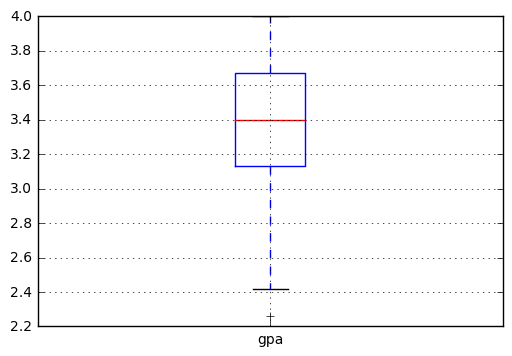

In [28]:
df_raw1.boxplot(column='gpa', by=None, ax=None, fontsize=10, rot=0, grid=True, figsize=(4,6), layout=None, return_type='axes')

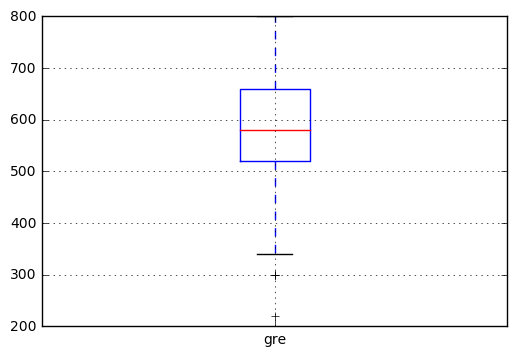

In [27]:
df_raw1.boxplot(column='gre', by=None, ax=None, fontsize=10, rot=0, grid=True, figsize=(4,6), layout=None, return_type='axes')

#### Question 7. What do these plots show?

Answer:

The GPA box plot shows that the full range of gpa scores were from 4 to 2.4, with a meadian of 3.4. The upper quartile starts are 3.7, while the lower quartile starts at 3.1, meaning 50% of candidates achieved scores between these ranges.

The GRE show that scores were spread between approx 320 and the max score at 800. Meadian score was just below 600, and the middle 50% of candidates achieved scores between approx 520 and 670.

#### Question 8. Describe each distribution 

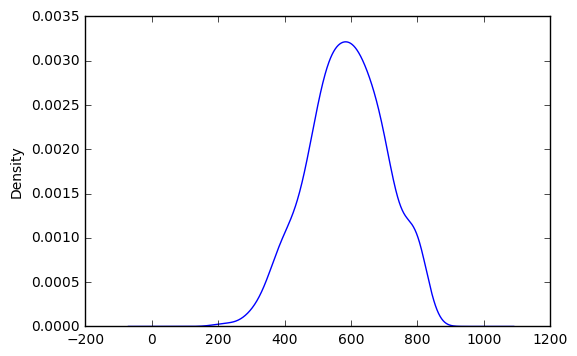

In [51]:
# plot the distribution of each variable 
df_raw1['gre'].plot(kind='density')




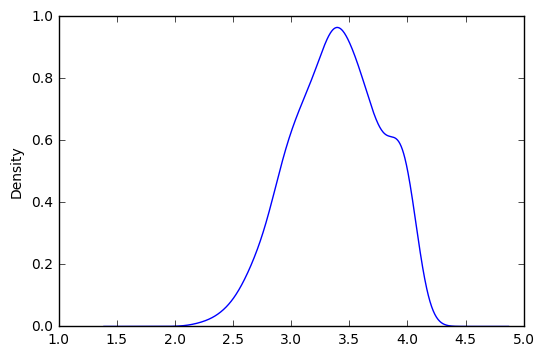

In [52]:
df_raw1['gpa'].plot(kind='density')


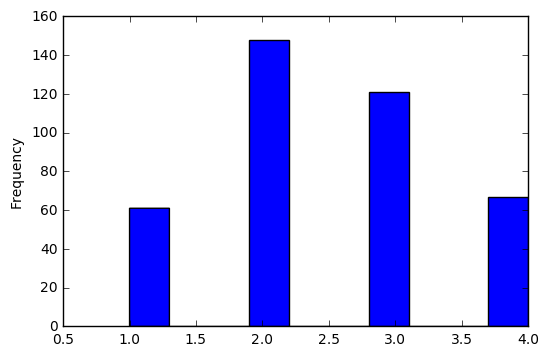

In [54]:

df_raw1['prestige'].plot(kind='hist')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, none of the of the variables are normally distributed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: They all need correction. GRE has kurtosis, and GPA and Prestige are positively skewed, 

#### Question 11. Which of our variables are potentially colinear? 

In [37]:
# create a correlation matrix for the data
df_raw1.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Prestige is negitively correlated with all other variables, this is because the higher the numbe for prestige the lower the prestige of the alma marta. Re-interpretted though,the matrix shows that the more prestige a college is the more likely a cadidate is be be admitted. GRE and GPA are positively correlated with all other variables. Lastly GRE and GPA are both have similar correlations with admit.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

To examine the association between Admit and prestige, a linear regression will be performed to investigate whether or not prestige predicts Admitance to the grad school in question. Step 1) will be to normalise the data which is a requirement for  a linear regression to be effective. Step 1) Will be to run the linear regression using a OLS regression to be able to predict whether prestige is a associated with admittance. Step 3) We will check for statistical signifcance to by assess the p-value of the regression

#### Question 14. What is your hypothesis? 

Answer: The H1 hypothesis that there is a positive correlation between high prestige and admittance.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data